## Time Seires Implementation
## Model Building

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import os

In [2]:
df = pd.read_csv("TSLA.csv")

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


In [4]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2956.000000,2956.000000,2956.000000,2956.000000,2956.000000,2.956000e+03
mean,138.691296,141.771603,135.425953,138.762183,138.762183,3.131449e+07
std,250.044839,255.863239,243.774157,250.123115,250.123115,2.798383e+07
min,3.228000,3.326000,2.996000,3.160000,3.160000,5.925000e+05
25%,19.627000,20.402000,19.127500,19.615000,19.615000,1.310288e+07
50%,46.656999,47.487001,45.820002,46.545000,46.545000,2.488680e+07
75%,68.057001,69.357500,66.911501,68.103998,68.103998,3.973875e+07
max,1234.410034,1243.489990,1217.000000,1229.910034,1229.910034,3.046940e+08


In [5]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [6]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
# Univariate Analysis
stock_data = df[["Date",'Close']]

In [8]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2956 entries, 0 to 2955
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2956 non-null   object 
 1   Close   2956 non-null   float64
dtypes: float64(1), object(1)
memory usage: 46.3+ KB


In [9]:
stock_data['Date'] = pd.to_datetime(stock_data.Date)

C:\Users\Pradum Gupta\AppData\Local\Temp\ipykernel_13284\2228350605.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Date'] = pd.to_datetime(stock_data.Date)


In [10]:
stock_data.Date.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2956 entries, 0 to 2955
Series name: Date
Non-Null Count  Dtype         
--------------  -----         
2956 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 23.2 KB


In [11]:
stock_data = stock_data.set_index('Date')

In [12]:
stock_data.head()

,Close
Date,
2010-06-29,4.778
2010-06-30,4.766
2010-07-01,4.392
2010-07-02,3.840
2010-07-06,3.222


In [13]:
# Converting date into Index will make it easier for retreving the data according to date.
# Visualization will also be easy.                                        

## Eda

In [14]:
stock_data

,Close
Date,
2010-06-29,4.778000
2010-06-30,4.766000
2010-07-01,4.392000
2010-07-02,3.840000
2010-07-06,3.222000
...,...
2022-03-18,905.390015
2022-03-21,921.159973
2022-03-22,993.979980


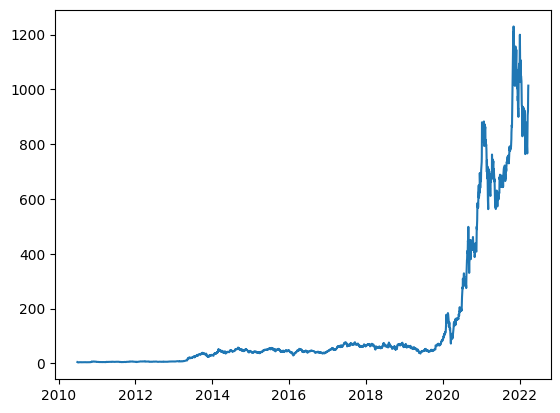

In [15]:
plt.plot(stock_data.Close)

In [16]:
df['Close'] = df['Close'][2200:]
df['Date']=df['Date'][2200:]

In [17]:
df = df.dropna()

In [18]:
df = df[['Date','Close']]

In [19]:
df['Date'] = pd.to_datetime(df.Date)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 756 entries, 2200 to 2955
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    756 non-null    datetime64[ns]
 1   Close   756 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 17.7 KB


In [21]:
df.set_index('Date')

,Close
Date,
2019-03-27,54.966000
2019-03-28,55.723999
2019-03-29,55.972000
2019-04-01,57.835999
2019-04-02,57.175999
...,...
2022-03-18,905.390015
2022-03-21,921.159973
2022-03-22,993.979980


In [22]:
df.describe()

,Date,Close
count,756,756.000000
mean,2020-09-23 19:10:28.571428608,440.166795
min,2019-03-27 00:00:00,35.793999
25%,2019-12-23 18:00:00,82.484501
50%,2020-09-23 12:00:00,418.695007
75%,2021-06-24 06:00:00,717.484985
max,2022-03-24 00:00:00,1229.910034
std,NaN,347.967886


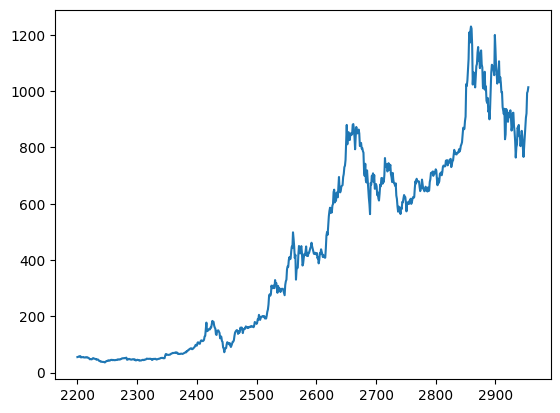

In [23]:
plt.plot(df.Close)

In [24]:
df.shape

(756, 2)

In [25]:
df.head()

,Date,Close
2200,2019-03-27,54.966000
2201,2019-03-28,55.723999
2202,2019-03-29,55.972000
2203,2019-04-01,57.835999
2204,2019-04-02,57.175999


<Axes: xlabel='Close', ylabel='Count'>

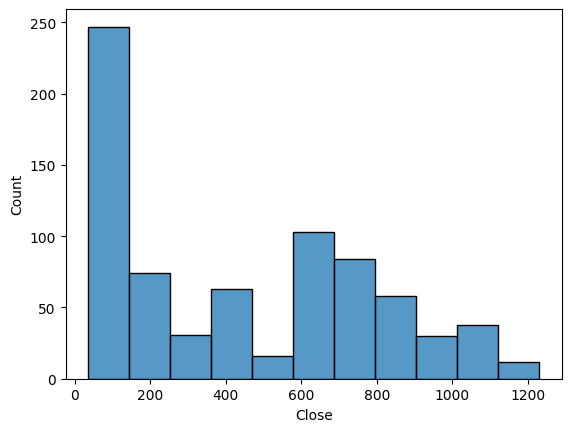

In [26]:
sns.histplot(df.Close)

C:\Users\Pradum Gupta\AppData\Local\Temp\ipykernel_13284\1393048044.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Close)


<Axes: xlabel='Close', ylabel='Density'>

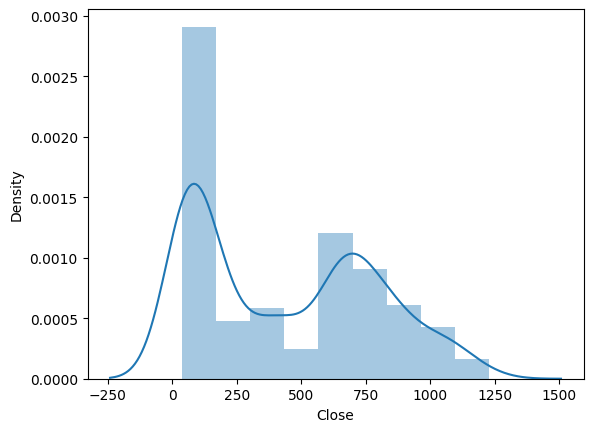

In [27]:
sns.distplot(df.Close)

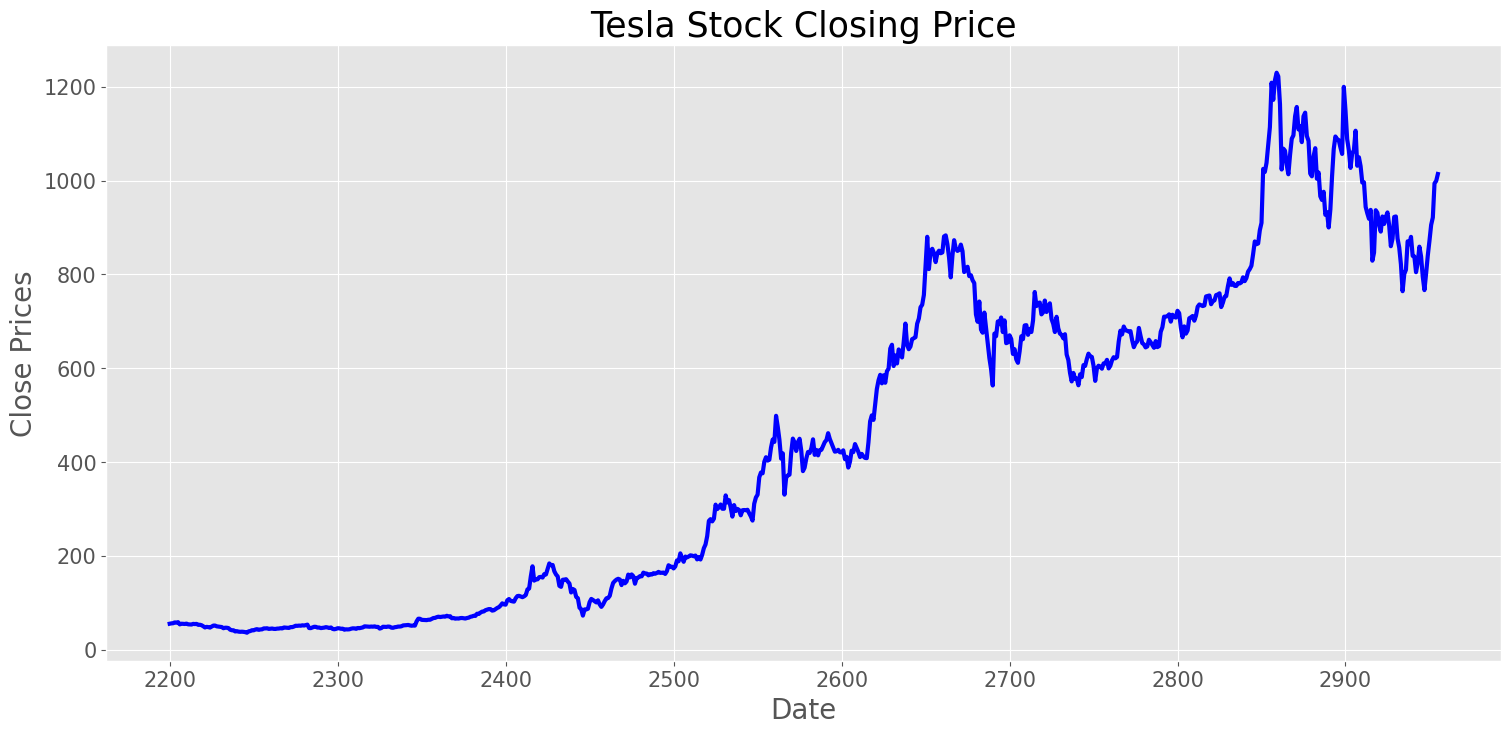

In [28]:
# Plotting close price 
plt.style.use('ggplot')
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Date',fontsize=20)
plt.xticks(fontsize=15)
plt.ylabel("Close Prices",fontsize=20)
plt.yticks(fontsize=15)
plt.plot(df['Close'],linewidth=3,color = 'blue')
plt.title("Tesla Stock Closing Price",fontsize=25)
plt.show()

In [29]:
# Claculating the movng average and standard deviation.
rolmean = df['Close'].rolling(120).mean()
rolstd = df.Close.rolling(120).std()

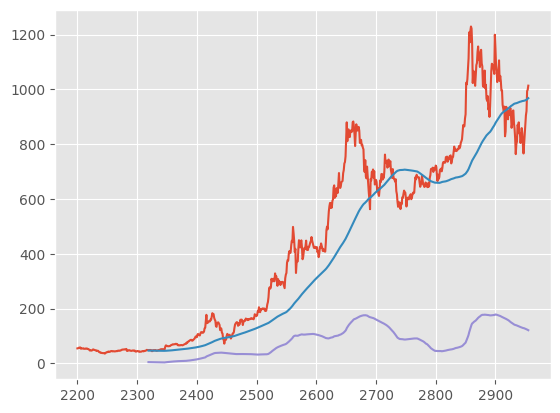

In [30]:
plt.plot(df.Close)
plt.plot(rolmean)
plt.plot(rolstd)

In [31]:
from  statsmodels.tsa.stattools import adfuller
adft = adfuller(df.Close)

In [32]:
pd.Series(adft[0:4],index=['test stats','p-value','lag','data points'])

test stats      -0.438640
p-value          0.903445
lag              0.000000
data points    755.000000
dtype: float64

In [33]:
null hypothesis = data is not stationary.
p-value = 0.903445

p<0.05
reject null hypothesis 

p>0.05
accept null hypothesis 

SyntaxError: invalid syntax (657600553.py, line 1)

In [37]:
# Test for stationary data
def test_stationary(timeseries):
    # Determining rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #plotting the rolling statstics.
    plt.figure(figsize=(18,8))
    plt.grid('both')
    plt.plot(timeseries,color='blue',label='Original',linewidth=3)
    plt.plot(rolmean, color='red',label='Rolling Mean',linewidth=3)
    plt.plot(rolstd,color='black',label='Rolling Std',linewidth=4)

    plt.legend(loc='best',fontsize = 20, shadow = True,facecolor='lightpink',edgecolor='k')
    plt.title("Rolling Mean and Standard Deviation",fontsize=25)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.show(block=False)

    print("Result of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will we give us without defining what the value are.
    # hence we manually write what values does it explains using a for loop.
    output = pd.Series(adft[0:4],index=['Test Satats','p-value','No. of lag used','Number of data points'])
    for key, values in adft[4].items(): 
        output['critical value (%s)'%key] = values
    print(output)

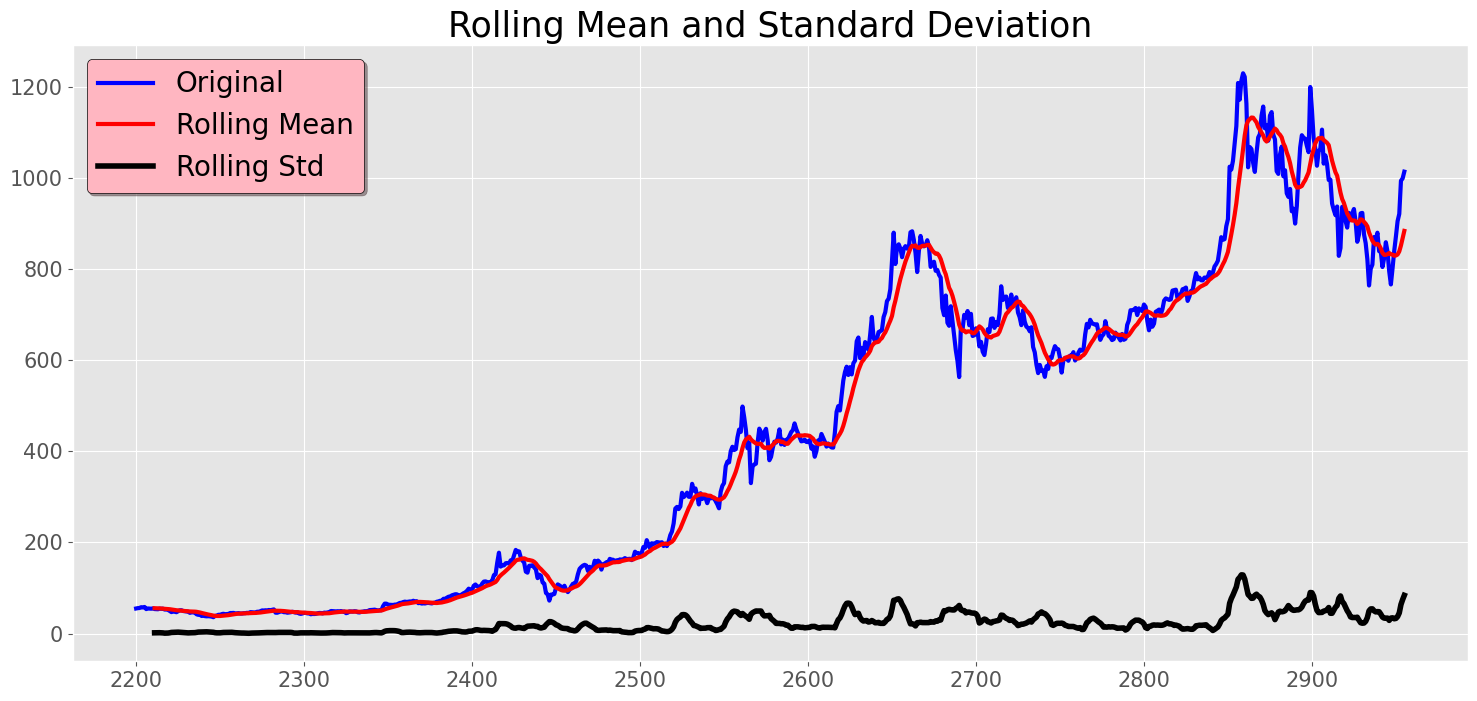

Result of dickey fuller test
Test Satats               -0.438640
p-value                    0.903445
No. of lag used            0.000000
Number of data points    755.000000
critical value (1%)       -3.439041
critical value (5%)       -2.865376
critical value (10%)      -2.568813
dtype: float64


In [38]:
test_stationary(df.Close)

{'whiskers': [<matplotlib.lines.Line2D at 0x28c60323510>,
 'caps': [<matplotlib.lines.Line2D at 0x28c6032c950>,
 'boxes': [<matplotlib.lines.Line2D at 0x28c60322ad0>],
 'medians': [<matplotlib.lines.Line2D at 0x28c6032dd50>],
 'fliers': [<matplotlib.lines.Line2D at 0x28c6032e550>],
 'means': []}

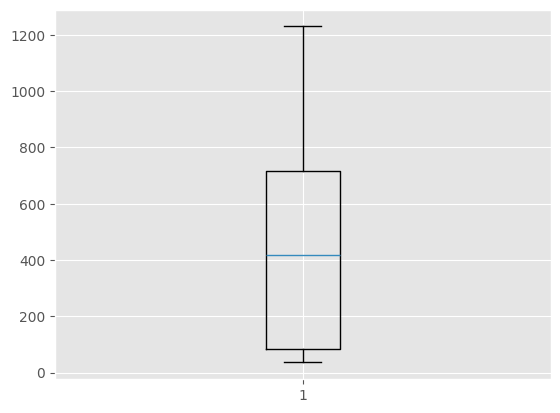

In [39]:
plt.boxplot(df.Close)

In [40]:
# Time Series Decomposition 
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['Close'],period=12)

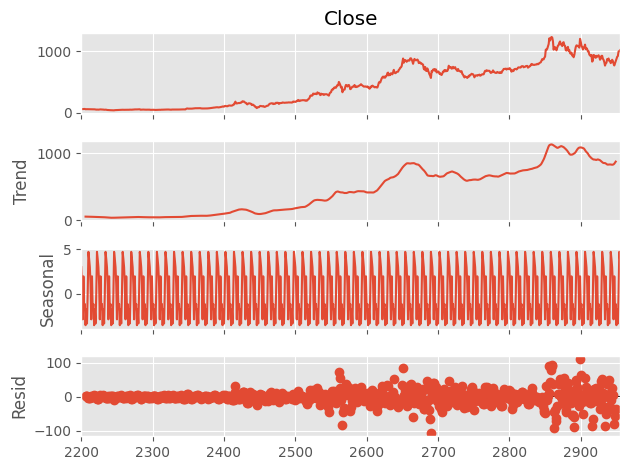

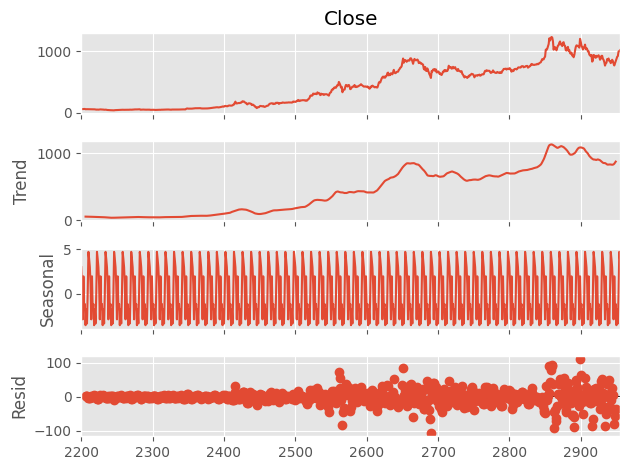

In [41]:
result.plot()

In [42]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

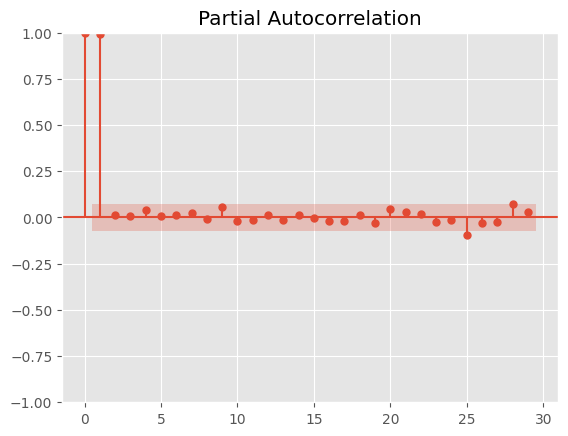

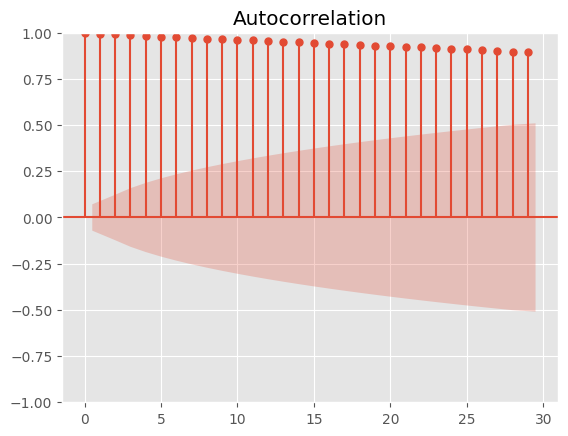

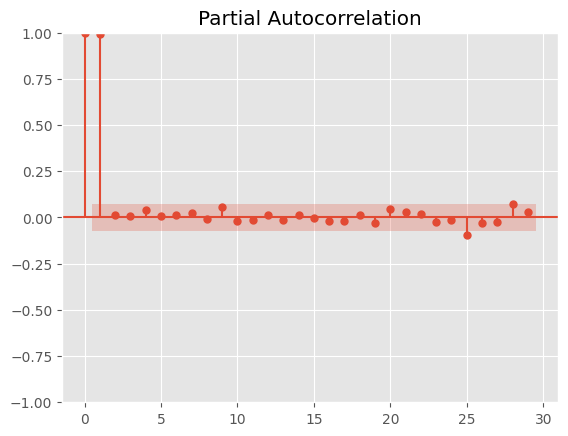

In [43]:
plot_acf(df.Close)
plot_pacf(df.Close)

In [44]:
df_close = df.Close

In [45]:
df_close

2200      54.966000
2201      55.723999
2202      55.972000
2203      57.835999
2204      57.175999
           ...     
2951     905.390015
2952     921.159973
2953     993.979980
2954     999.109985
2955    1013.919983
Name: Close, Length: 756, dtype: float64

In [46]:
# Converting the data into stationary by applying differenting.
df_close = df_close.diff(2)
df_close = df_close.dropna()

In [47]:
df.Close.shape

(756,)

In [48]:
df_close

2202     1.006000
2203     2.112000
2204     1.203999
2205     0.526001
2206    -3.619999
          ...    
2951    65.160035
2952    49.559997
2953    88.589965
2954    77.950012
2955    19.940003
Name: Close, Length: 754, dtype: float64

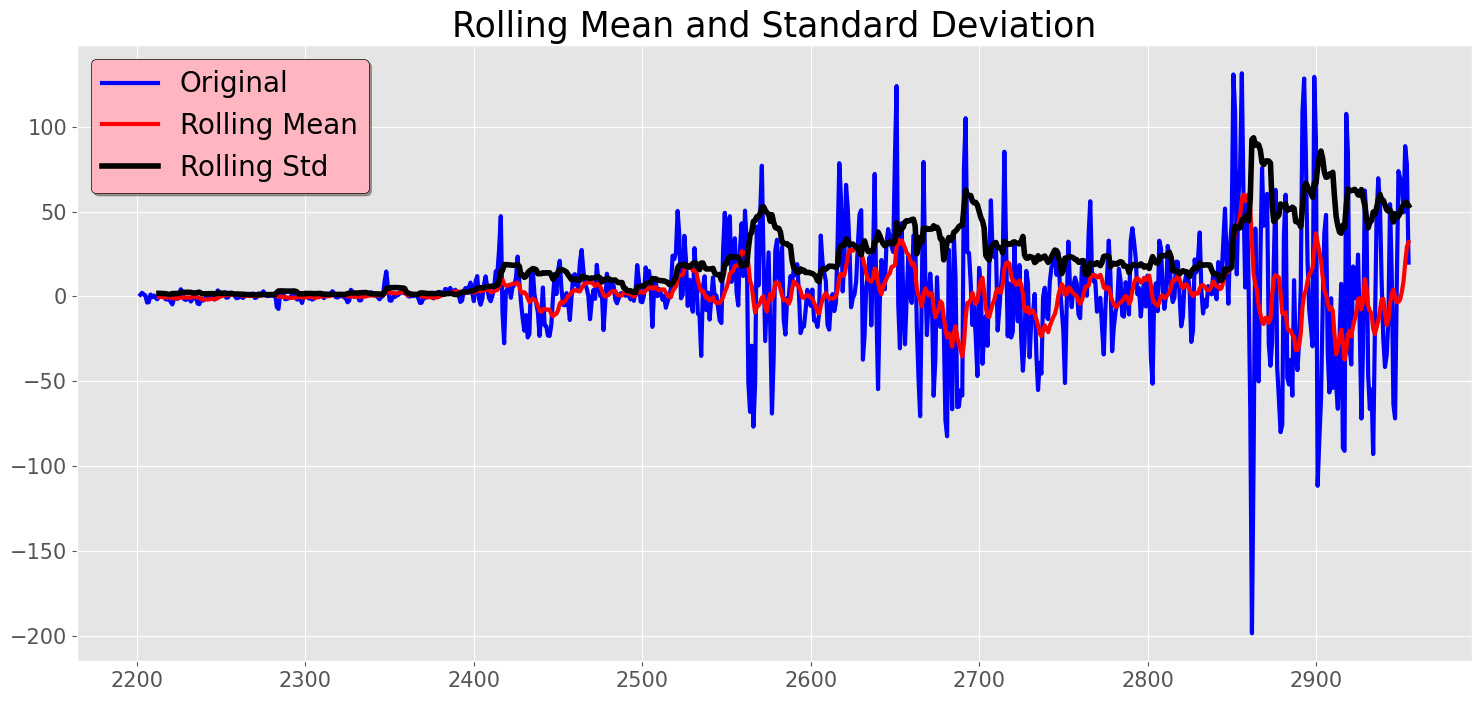

Result of dickey fuller test
Test Satats             -6.319648e+00
p-value                  3.088653e-08
No. of lag used          1.700000e+01
Number of data points    7.360000e+02
critical value (1%)     -3.439266e+00
critical value (5%)     -2.865475e+00
critical value (10%)    -2.568865e+00
dtype: float64


In [49]:
test_stationary(df_close)

In [50]:
df_close[:-60]

2202      1.006000
2203      2.112000
2204      1.203999
2205      0.526001
2206     -3.619999
           ...    
2891      5.960022
2892    108.929993
2893    128.469971
2894     85.069946
2895     21.469971
Name: Close, Length: 694, dtype: float64

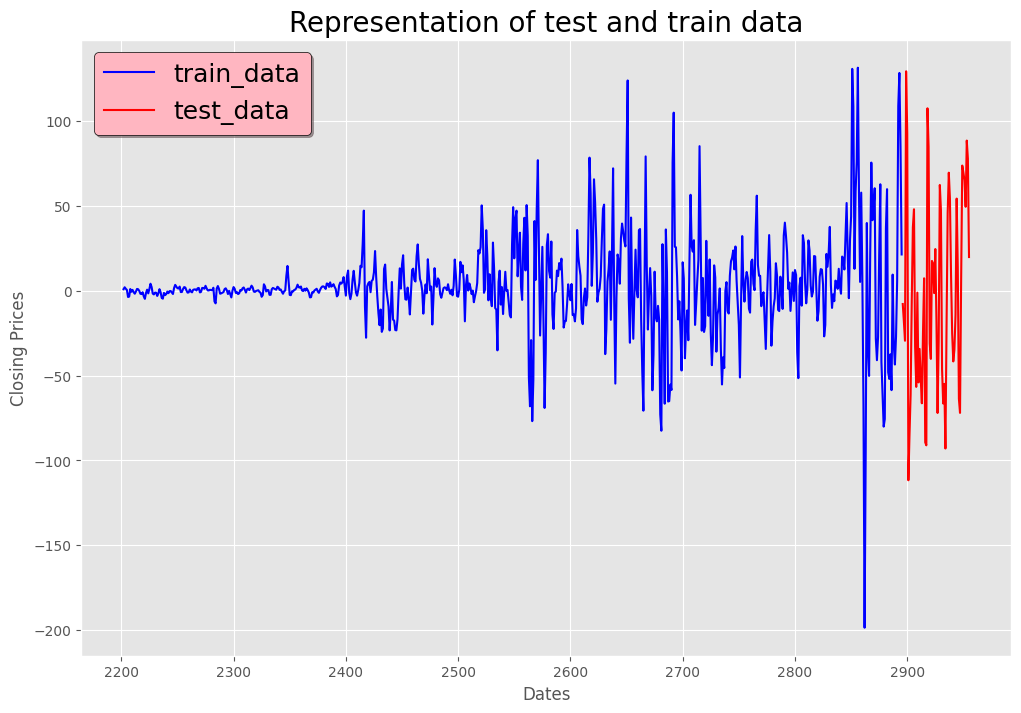

In [51]:
## Spliting data into train and test and plotting them. 
train_data = df_close[:-60]
test_data = df_close[-60:]

plt.figure(figsize=(12,8))
plt.plot(train_data,label='train_data',color='blue')
plt.plot(test_data,label='test_data',color='red')
plt.legend(loc='best',fontsize = 18,shadow=True, facecolor='lightpink', edgecolor='k')
plt.title("Representation of test and train data",fontsize=20)
plt.xlabel("Dates",fontsize=12)
plt.ylabel("Closing Prices",fontsize = 12)
plt.grid(True)

In [52]:
import statsmodels.api as sm 
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [53]:
history = [x for x in train_data]

In [54]:
history

[1.0060000000000002,
 2.112000000000002,
 1.203998999999996,
 0.5260010000000008,
 -3.619999,
 -3.369999,
 1.0839990000000057,
 -0.5299990000000037,
 0.5720029999999952,
 -0.7780039999999957,
 -1.6720010000000016,
 -0.4079970000000017,
 1.132000000000005,
 0.9699969999999993,
 -0.0200010000000006,
 -1.6959990000000005,
 -1.8720010000000045,
 -0.8180010000000024,
 -3.2539979999999957,
 -4.703997999999999,
 -1.2320020000000014,
 0.7099990000000034,
 -1.492001000000002,
 1.0820009999999982,
 4.204003,
 2.248001000000002,
 -1.5940019999999961,
 -2.1000020000000035,
 -1.0159990000000008,
 -1.064,
 -2.9939999999999998,
 -1.4419970000000006,
 0.9879990000000021,
 -0.7960020000000014,
 -4.1839980000000025,
 -4.594000999999999,
 -1.1900019999999998,
 -2.5259980000000013,
 -1.9179990000000018,
 -0.42000199999999666,
 -1.357998000000002,
 -0.1539989999999989,
 -0.09600099999999401,
 -0.9399990000000003,
 -1.8500020000000035,
 1.6880000000000024,
 3.524002000000003,
 2.469997999999997,
 1.58200099

In [55]:
model = ARIMA(history,order=(1,1,1))


In [56]:
model = model.fit()

In [57]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  694
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3179.955
Date:                Wed, 12 Feb 2025   AIC                           6365.910
Time:                        08:29:13   BIC                           6379.533
Sample:                             0   HQIC                          6371.179
                                - 694                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5065      0.019     27.356      0.000       0.470       0.543
ma.L1         -1.0000      0.195     -5.118      0.000      -1.383      -0.617
sigma2       562.1169    112.067      5.016      0.000     342.469     781.765
===================================================================================
Ljung-Box (L1) (Q):                  13.49   Jarque-Bera (JB):              1242.66
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):              43.56   Skew:                             0.00
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [58]:
model.forecast()

array([12.35957216])

In [59]:
test_data = test_data.reset_index()

In [60]:
test_data = test_data.drop(columns='index')

In [61]:
test_data[:1]

,Close
0,-7.75


In [62]:
mean_squared_error(test_data[:1],model.forecast())

404.39489260251327

In [110]:
def train_arima_model(X,y,arima_order):
    ## Prepare traning dataset 
    ## make predection list 
    history = [x for x in X]
    prediction = list()
    for t in range(len(y)):
        model = ARIMA(history,order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        prediction.append(yhat)
        history.appen(y[t])
    # Claculate out of sample error 
    rmse = np.sqrt(mean_squared_error(y,prediction))
    return rmse

In [111]:
# evaluate the different combinations of p,d,q values for an ARIMA model to get the best accuracy 
def evaluate_model(dataset,test,p_value,d_value,q_value): 
    dataset= dataset.astype('float32')
    best_score,best_cfg= float("inf"),None 
    for p in p_values:
        for d in d_values: 
            for q in q_values: 
                order = (p,d,q)
                try:
                    rmse=train_arima_model(dataset,test,order)
                    if rmse < best_score: 
                        best_score,best_cfg = rmse,order
                    print("ARIMA%s RMSE = %.3f" %(order,rmse))
                except: 
                    continue
    print('Best ARIMA%s RMSE =%.3f' %(best_cfg, best_score))
                

In [112]:
import warnings 
warnings.filterwarnings('ignore')
p_values = range(0,3)
d_values = range(0,3) 
q_values = range(0,3)
evaluate_model(train_data,test_data,p_values,d_values,q_values)

Best ARIMANone RMSE =inf


In [109]:
history = [x for x in list(train_data)]
predection = list()
for i in range(len(test_data)): 
    model = ARIMA(history,order=(2,0,0))
    model = model.fit()
    fc = model.forecast(alpha=0.05)
    predection.append(fc)
    history.append(list(test_data)[i])
print(f'my RMSE {np.sqrt(mean_squared_error(list(test_data),predection))}')

my RMSE 47.49582184686506


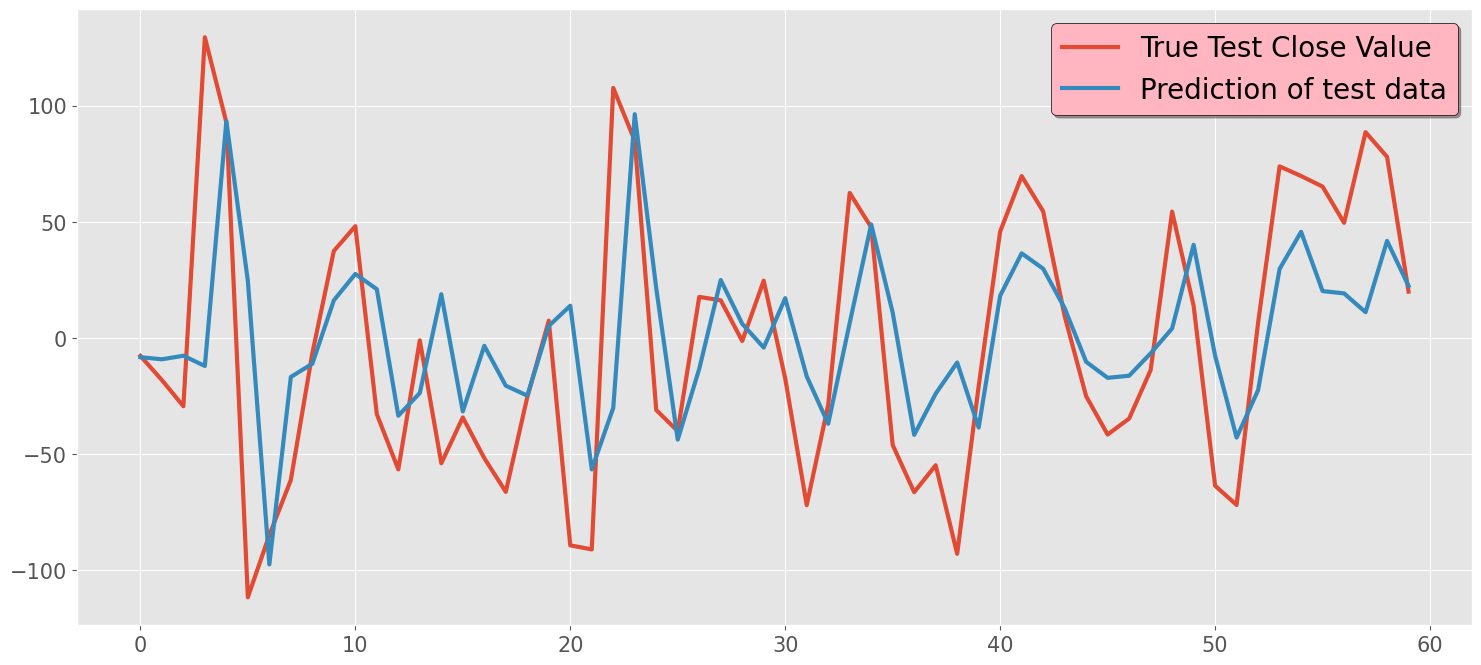

In [114]:
plt.figure(figsize=(18,8))
plt.grid(True)
plt.plot(range(len(test_data)),test_data,label="True Test Close Value",linewidth=3)
plt.plot(range(len(predection)),predection,label="Prediction of test data",linewidth=3)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=20,shadow=True,facecolor='lightpink',edgecolor='k')
plt.show()

In [115]:
fc_series = pd.Series(predection,index=test_data.index)

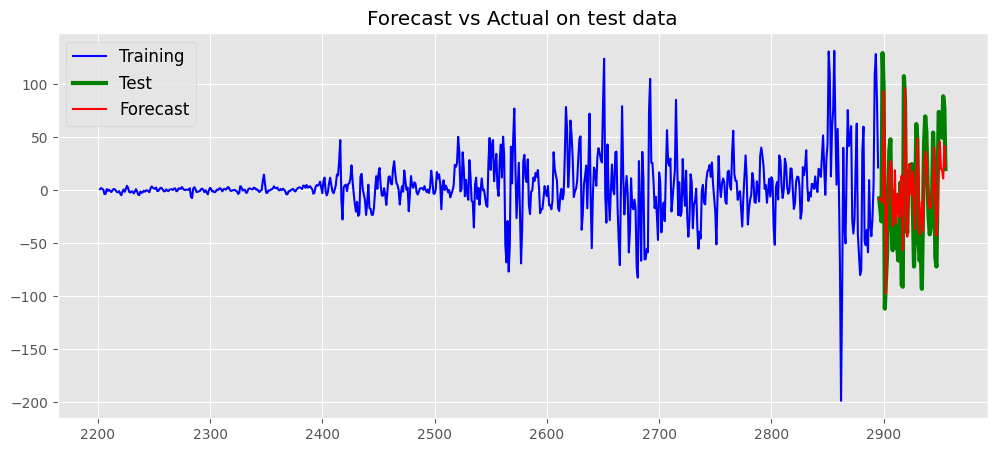

In [119]:
# Plot 
plt.figure(figsize=(12,5),dpi=100)
plt.plot(train_data,label="Training",color='blue')
plt.plot(test_data,label="Test",color='green',linewidth=3)
plt.plot(fc_series,label='Forecast',color='red') 
plt.title("Forecast vs Actual on test data")
plt.legend(loc='upper left',fontsize=12)
plt.show()


In [ ]:
model

AttributeError: 'ARIMAResults' object has no attribute 'fit'

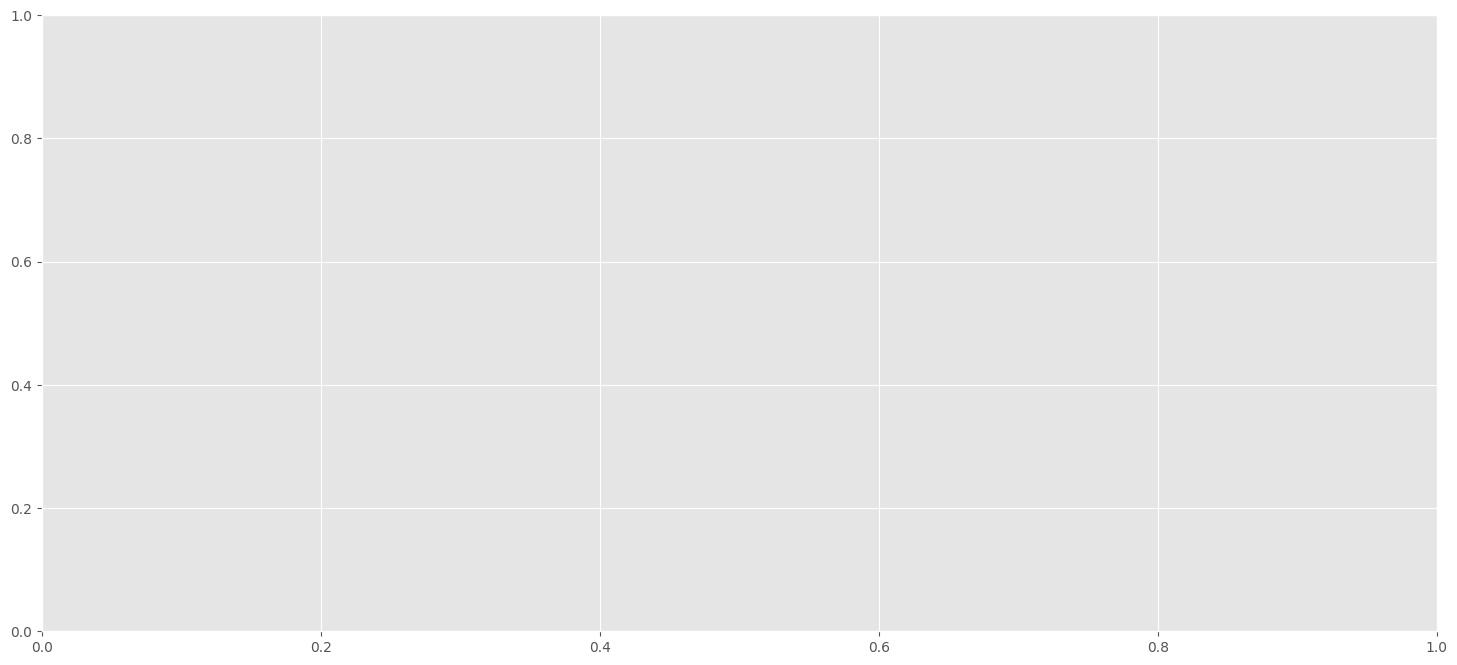

In [122]:
from statsmodels.graphics.tsaplots import plot_predict
fig = plt.figure(figsize=(18,8))
ax1 = fig.add_subplot(111)
plot_predict(result=model.fit(),start=1,end=len(df_close)+60,ax=ax1)
plt.grid("both")
plt.legend(['Forecast','Close','95% Confidence interval'],fontsize=20,shadow=True,facecolor='lightblue',edgecolor='k')
plt.show()